# Setup

In [5]:
from coba.experiments import Result
from matplotlib import pyplot as plt

c1 = "#E69F00"
c2 = "#0072B2"
c3 = "#009E73"
c4 = "#56B4E9"
c5 = "#D55E00"

plt.rc('font',weight='normal',size=14)

figsize = (6,2.5)
legend  = dict(columnspacing=1,handletextpad=.4,handlelength=1)

def plt_legend(order=[],**kwargs):
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for l in labels:
        print(l)
    
    order = order or range(len(handles))
    plt.legend([handles[i] for i in order], [labels[i] for i in order],**legend,**kwargs)

In [2]:
#0=para; 1=EMT-CB (self-consistent); 2=EMT-CB (not self-consistent); 3=CMT-CB; 4=PEMT; 5=PCMT
unbounded = Result.from_file('../outcomes/unbounded.log.gz').filter_fin()

# Unbounded

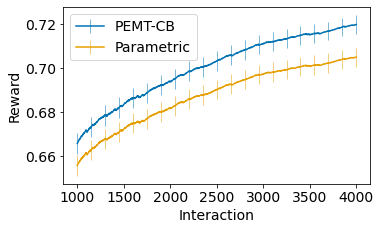

In [13]:
plt.figure(figsize=(5.5,5))
unbounded.filter_lrn(learner_id=[0,4]).filter_fin(4000).plot_learners(labels=['Parametric','PEMT-CB'],err='se',xlim=[1000,4000],colors=[c1,c2],out=None)
plt.title('',loc='left')
plt.legend(loc='upper left')
plt.savefig('overall_final.pdf',format='pdf', bbox_inches="tight")

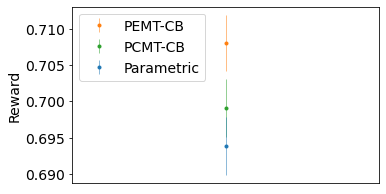

In [47]:
plt.figure(figsize=(5.5,5))
unbounded.filter_lrn(learner_id=[0,4,5]).plot_learners(x=['scale_target'],err='se',labels=['Parametric','PEMT-CB','PCMT-CB'],out=None)
plt.title('',loc='left')
plt.legend(loc='upper left')
plt.xticks([])
plt.xlabel('')

#plt.show()
plt.savefig('overall_final.pdf',format='pdf', bbox_inches="tight")


In [101]:
##Table 1
import numpy as np

algorithms = ["PEMT-CB", "EMT-CB", "PCMT-CB", "CMT-CB", "Parametric"]
indexes = [4,1,5,3,0]
wins = np.zeros([len(unbounded.learners)-1]*2)

for i in range(len(indexes)):
    for j in range(i+1,len(indexes)):
        unbounded.plot_contrast(indexes[i], indexes[j],x='openml_task', err='se', labels=['1','2'], out=None)
        handles, labels = plt.gca().get_legend_handles_labels()
        labels = L.pop(0)
        print(labels)
        j_wins = int(labels[0][labels[0].find('(')+1:labels[0].find(')')])
        i_wins = int(labels[-1][labels[-1].find('(')+1:labels[-1].find(')')])
        wins[i,j] = i_wins
        wins[j,i] = j_wins
        plt.close()

wins

array([[  0., 167.,  87., 196., 110.],
       [ 31.,   0.,  42., 177.,  44.],
       [  4., 156.,   0., 192.,  75.],
       [  7.,  11.,  10.,   0.,  17.],
       [  8., 151.,  10., 184.,   0.]])

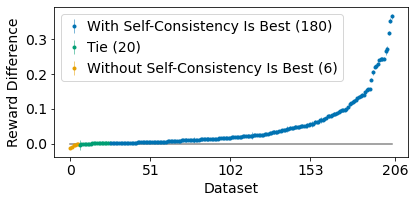

In [26]:
plt.figure(figsize=figsize)

unbounded.plot_contrast(1,2,x='openml_task',err='se',labels=['With Self-Consistency Is Best','Without Self-Consistency Is Best'],colors=[c1,c3,c2],xticks=False,out=None)

plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,51,102,153,207],[0,51,102,153,206],rotation=0)
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()

plt.savefig('consistency_data.pdf',format='pdf', bbox_inches="tight")

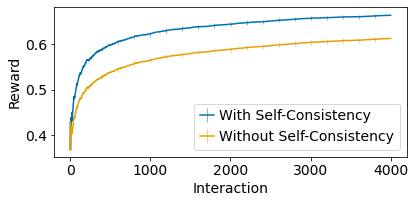

In [27]:
plt.figure(figsize=figsize)
unbounded.filter_lrn(learner_id=[1,2]).filter_fin(4000).plot_learners(err='se',labels=['With Self-Consistency','Without Self-Consistency'],colors=[c2,c1],out=None)
plt.title('',loc='left')
plt_legend(loc='lower right')
plt.xticks(list(range(0,4001,1000)),rotation=0)
plt.tight_layout()

plt.savefig('consistency_time.pdf',format='pdf', bbox_inches="tight")

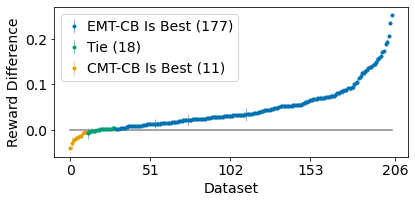

In [28]:
plt.figure(figsize=figsize)
unbounded.plot_contrast(1,3,x='openml_task',err='se',labels=['EMT-CB Is Best','CMT-CB Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,51,102,153,207],[0,51,102,153,206],rotation=0)
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()

plt.savefig('emt_cmt_data.pdf',format='pdf', bbox_inches="tight")

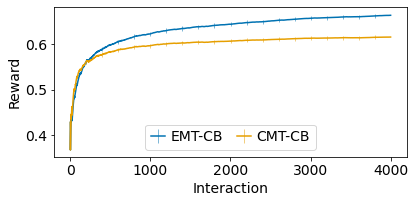

In [29]:
plt.figure(figsize=figsize)
unbounded.filter_fin(4000).filter_lrn(learner_id=[1,3]).plot_learners(err='se',labels=['EMT-CB','CMT-CB'],colors=[c2,c1],out=None)
plt.title('',loc='left')
plt_legend(loc='lower center',ncol=2)
plt.xticks(list(range(0,4001,1000)),rotation=0)
plt.tight_layout()

plt.savefig('emt_cmt_time.pdf', format='pdf', bbox_inches="tight")

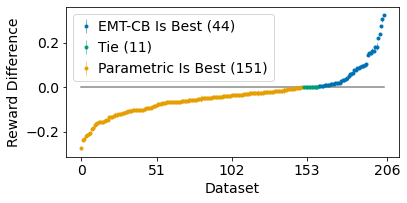

In [30]:
plt.figure(figsize=figsize)
unbounded.plot_contrast(1,0,x='openml_task',err='se',labels=['EMT-CB Is Best','Parametric Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,51,102,153,207],[0,51,102,153,206],rotation=0)
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()

plt.savefig('emt_para_data.pdf', format='pdf', bbox_inches="tight")

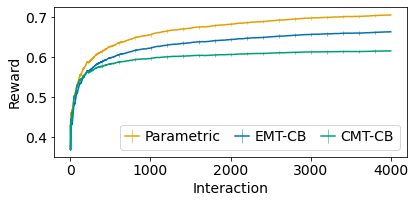

In [31]:
plt.figure(figsize=figsize)
unbounded.filter_fin(4000).filter_lrn(learner_id=[0,1,3]).plot_learners(err='se',labels=['Parametric','EMT-CB','CMT-CB'],colors=[c1,c2,c3],out=None)
plt.title('',loc='left')
plt_legend(loc='lower right',ncol=3)
plt.xticks(list(range(0,4001,1000)),rotation=0)
plt.tight_layout()

plt.savefig('emt_para_time.pdf', format='pdf', bbox_inches="tight")

Parametric Is Best (8)
Tie (88)
PEMT-CB Is Best (110)


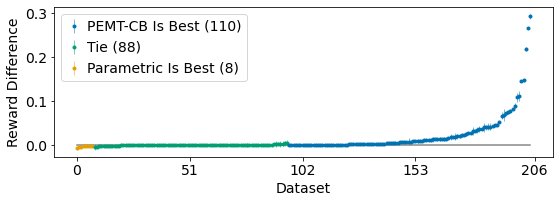

In [56]:
plt.figure(figsize=(8,2.5))
unbounded.plot_contrast(4,0,x='openml_task',err='se',labels=['PEMT-CB Is Best','Parametric Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,51,102,153,207],[0,51,102,153,206],rotation=0)
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()

plt.savefig('pemt_para_data.pdf', format='pdf', bbox_inches="tight")

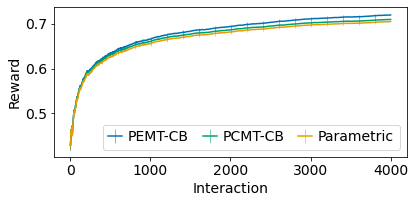

In [33]:
plt.figure(figsize=figsize)
unbounded.filter_fin(4000).filter_lrn(learner_id=[0,4,5]).plot_learners(err='se',labels=['Parametric','PEMT-CB','PCMT-CB'],colors=[c1,c2,c3],out=None)
plt.title('',loc='left')
plt_legend(loc='lower right',ncol=3)
plt.xticks(list(range(0,4001,1000)),rotation=0)
plt.tight_layout()

plt.savefig('pemt_para_time.pdf', format='pdf', bbox_inches="tight")

# Bounded

In [6]:
#parametric, 1_000, 2_000, 16_000, 32_000
bounded = Result.from_file('../outcomes/bounded.log.gz').filter_fin()
bounded

{'Learners': 5, 'Environments': 5824, 'Interactions': 931840000}


32,000
16,000
1,000
Parametric


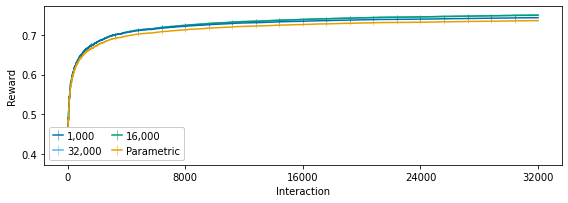

In [7]:
labels = ['Parametric', '1,000', '16,000', '32,000']
colors = [c1,c2,c3,c4,c5]

plt.figure(figsize=(8,2.5))
bounded.filter_lrn(learner_id=[0,1,3,4]).plot_learners(err='se',labels=labels,colors=colors,out=None)
plt.title('',loc='left')
plt_legend([2,0,1,3], loc='lower left', ncol=2, facecolor='white', framealpha=1)
plt.xticks([0,8000,16000,24000,32000],[0,8000,16000,24000,32000],rotation=0)

plt.tight_layout()
plt.savefig('bounded_full.pdf', format='pdf', bbox_inches="tight")

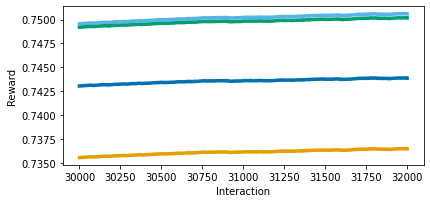

In [5]:
labels = ['Parametric', '1,000', '16,000', '32,000']
colors = [c1,c2,c3,c4,c5]

original = plt.rcParams['lines.linewidth']
plt.rcParams['lines.linewidth'] = 3.5

plt.figure(figsize=figsize)
bounded.filter_lrn(learner_id=[0,1,3,4]).plot_learners(err=None,xlim=(30000,32000),labels=labels,colors=colors,out=None)

plt.title('',loc='left')
plt.legend('',frameon=False)
#plt.xticks([])
#plt.yticks([])

plt.rcParams['lines.linewidth'] = original

plt.tight_layout()
plt.savefig('bounded_zoom.pdf', format='pdf', bbox_inches="tight")

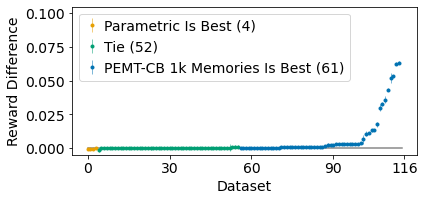

In [12]:
if False:
    plt.figure(figsize=figsize)
    bounded.plot_contrast(1,0,ylim=(0,.1),x='openml_task',err='se',labels=['PEMT-CB 1k Memories Is Best','Parametric Is Best'] ,colors=[c1,c3,c2],xticks=False,out=None)
    plt.title('',loc='left')
    plt_legend(loc='upper left')
    plt.xticks([0,30,60,90,116],[0,30,60,90,116],rotation=0)
    plt.xlabel("Dataset")
    plt.ylabel("Reward Difference")
    plt.tight_layout()

    plt.savefig('pemt_1k_para_data.pdf', format='pdf', bbox_inches="tight")